# 比值法
将两幅图像按波段进行逐像素除法操作，获取比值图像。  
以los Angeles附近的区域的红光波段为例，数据来源：https://earthexplorer.usgs.gov/  
数据集: Landsat Collection 2 U.S Analysis Ready Data (ARD)  

# 裁剪图像

In [1]:
from osgeo import gdal
import os

os.chdir(r'D:\Projects\VsCode\Python\img_processing_system\change_detection\imgs\difference') 
src_file_2025 = 'ratio_LC09_CU_003012_20250429_20250505_02_SR_B3.TIF'
dst_file_2025 = 'ratio_LC09_CU_003012_20250429_20250505_02_SR_B3_subset.tif'

src_file_2010 = 'ratio_LT05_CU_003012_20100419_20210430_02_SR_B3.TIF'
dst_file_2010= 'ratio_LT05_CU_003012_20100419_20210430_02_SR_B3_subset.TIF'


win_xsize = 1150
win_ysize = 1350
offset_x, offset_y = 3800, 2300

ds_2025 = gdal.Translate(
    dst_file_2025,
    src_file_2025,
    srcWin=[offset_x, offset_y, win_xsize, win_ysize]  # x_offset, y_offset, width, height
)
del ds_2025

ds_2010 = gdal.Translate(
    dst_file_2010,
    src_file_2010,
    srcWin=[offset_x, offset_y, win_xsize, win_ysize]  # x_offset, y_offset, width, height
)
del ds_2010

# 计算比值图

In [2]:
from osgeo import gdal
import numpy as np
ds_subset_2025 = gdal.Open("ratio_LC09_CU_003012_20250429_20250505_02_SR_B3_subset.TIF")
ds_subset_2010 = gdal.Open("ratio_LT05_CU_003012_20100419_20210430_02_SR_B3_subset.TIF")
band_subset_2025 = ds_subset_2025.GetRasterBand(1)
band_subset_2010 = ds_subset_2010.GetRasterBand(1)
data_2025 = band_subset_2025.ReadAsArray()
data_2010 = band_subset_2010.ReadAsArray()
gtiff_driver = gdal.GetDriverByName('GTiff') 
res_ds = gtiff_driver.Create("ratio.TIF", win_xsize, win_ysize, bands = 1, eType=ds_subset_2025.GetRasterBand(1).DataType)
res_ds.SetProjection(ds_subset_2025.GetProjection()) 
res_ds.SetGeoTransform(ds_subset_2025.GetGeoTransform())
ratio = data_2010/data_2025
print(ratio.shape)
# Use numpy logical_or (or the bitwise |) to create an element-wise boolean mask
change_mask = np.logical_or(ratio >= 2, ratio <= 0.5)
res_ds.GetRasterBand(1).WriteArray(ratio)
del res_ds

(1350, 1150)


In [3]:
print(data_2025)

[[ 9498  9531  9676 ... 11313 13445 11698]
 [ 9663  9631  9700 ... 11055 13736 11930]
 [ 9971 10271 10906 ... 11204 11438 12165]
 ...
 [11970 11618 11866 ... 10311 10188 10139]
 [11634 12092 12067 ... 10324 10302 10155]
 [11875 11925 11782 ... 10308 10452 10401]]


# 可视化变化区域

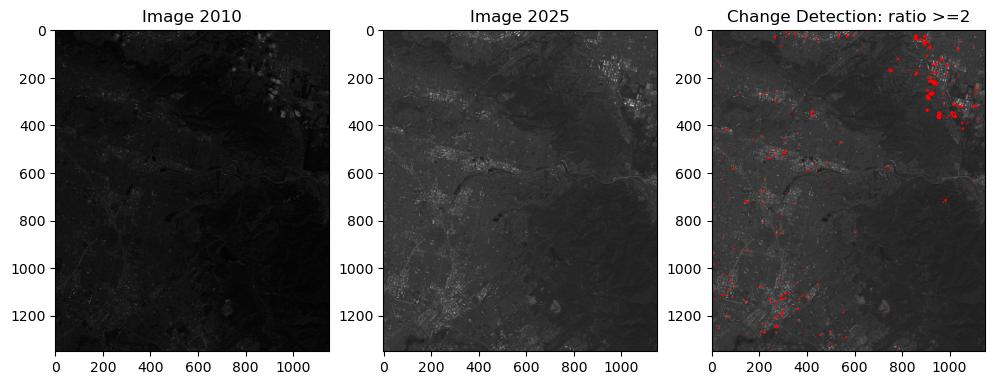

In [ ]:
import matplotlib.pyplot as plt

# 创建一个新的图像
plt.figure(figsize=(12, 6))

# 绘制第一幅图像
plt.subplot(1, 3, 1)
plt.imshow(data_2010, cmap='gray')
plt.title("Image 2010")

# 绘制第二幅图像
plt.subplot(1, 3, 2)
plt.imshow(data_2025, cmap='gray')
plt.title("Image 2025")

# 绘制第二幅图像
plt.subplot(1, 3, 3)
plt.imshow(data_2025, cmap='gray')

# 绘制变化区域
plt.contour(change_mask, colors='r', linewidths=1)
plt.title("Change Detection: ratio >=2")

# 显示图像
plt.show()